# DBSCAN


## Importing the libraries

In [1]:
import numpy as np
import pandas as pd

In [34]:
import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

## Importing the dataset

In [2]:
url="https://raw.githubusercontent.com/kulkarni62sushil/Data/main/KMEM1.csv"
d1=pd.read_csv(url)

In [3]:
d1.head()

,x,y
0,1.206087,1.847686
1,0.351919,0.245691
2,1.201688,0.630774
3,0.733710,1.364328
4,1.150745,0.724892


Dataset consists of 2 columns `x` and `y`
Note that DBSCAN is a clustering algorithm so we don't divide `training` and `test` data

**Q.** As data is scattered so bring them to `standard scale`

In [4]:
from sklearn.preprocessing import StandardScaler
z = StandardScaler()
d1[["x","y"]] = z.fit_transform(d1[["x","y"]])

**Q.** Plot the data using`ggplot`

To get `ggplot`, install: 

In [ ]:
!pip install plotnine

**Open Anaconda Prompt (Windows) or Terminal (Mac) and type:**

pip install ggplot


In [5]:
from plotnine import *

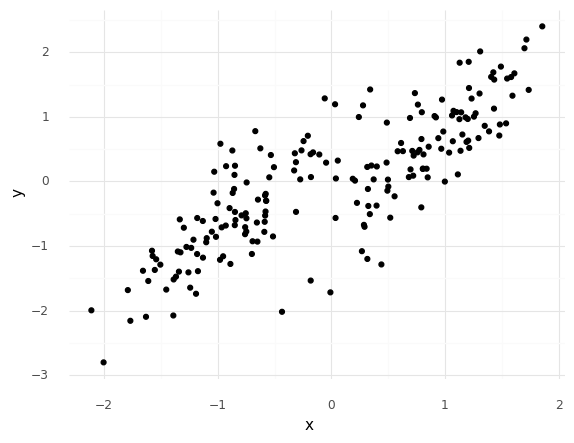

<ggplot: (8788865619731)>

In [6]:
# ggplot() is under plotnine
ggplot(d1, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

## Apply DBSCAN 

Here we require two parameters (i) `eps`- radius of the cluster and (ii) `min_sample`- minimum number of elements in a cluster

In [7]:
# dbscan and plot
from sklearn.cluster import DBSCAN
db1 = DBSCAN(eps = 0.5, min_samples = 25)

In [8]:
db1.fit(d1)

DBSCAN(min_samples=25)

When `DBSCAN` returns the cluster assignments it classifies all the points that are noise as negative one and then returns the cluster membership for all of the rest of the data points like 0,1,2,3,.. 

In [9]:
labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db1.labels_)))]

In [10]:
labsList

['Noise', 'Cluster 1', 'Cluster 2']

Observe that there are two clusters and a noise 

In [11]:
d1["assignments"] = db1.labels_

In [12]:
d1["assignments"]

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199   -1
Name: assignments, Length: 200, dtype: int64

Observe that labels are assign to each row like -1,0,1,... 
-1 indicates noise and remaining goes to cluster


## Plot a graph 

Now we are in dataframe so we plot these points

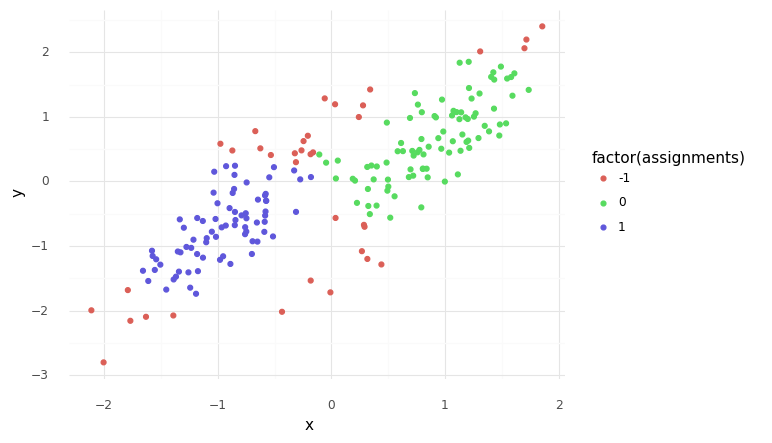

<ggplot: (8788866352107)>

In [13]:
(ggplot(d1, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() + theme_minimal())

To make it more attractive, use  
* scale_color_discrete(): give `name` as `"Cluster Assignment` and `labels` as all assigned list as `labsList`
* give heading with `labs`

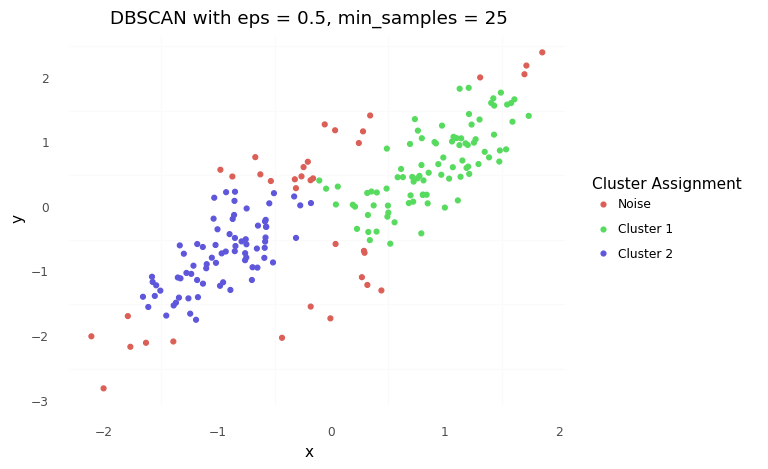

<ggplot: (8788866398567)>

In [14]:
(ggplot(d1, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
 theme(panel_grid_major = element_blank())+
labs(title = "DBSCAN with eps = 0.5, min_samples = 25"))

Observe that `noise` is shown by `red` and two clusters by `blue` and `green`

# Performance of Cluster using Silhouette Coefficient:

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

* 1: Means clusters are well apart from each other and clearly distinguished.
* 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
* -1: Means clusters are assigned in the wrong way.


**Silhouette Score = (b-a) / max(a,b)**

where

a= average intra-cluster distance i.e the average distance between each point within a cluster.

b= average inter-cluster distance i.e the average distance between all clusters.








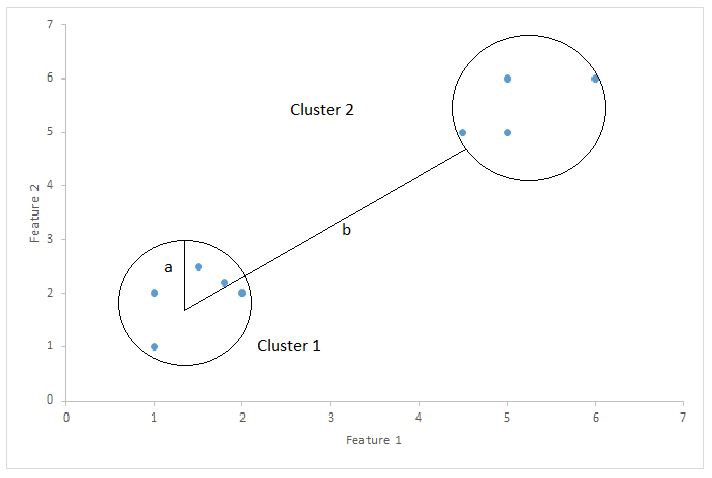


In DBSCAN, Silhouette Coefficient is calculated in two ways:

* Calculate performance with data points which are not noise 
* Calculate performance with data points which are in clusters and noise

**Calculate performance with data points which are not noise** 

To calculate this we know that noise is assigned to -1 and points inside the cluster as 0,1,2 etc. So we can locate `assignments`, which are greater than or equal to zero.  

In [15]:
# grab only clustered data points - no noise
from sklearn.metrics import silhouette_score

d1_clustered = d1.loc[(d1.assignments >= 0)]

silhouette_score(d1_clustered[["x","y"]], d1_clustered["assignments"])

0.6169609560667532

This means that clusters are cohesive and separate at least when we're considering only the data points that are clustered and without noise 

However technically we could also calculate the silhouette score including noise clusters as follows

In [16]:
# overall- contains clusters and noise 
silhouette_score(d1[["x","y"]], d1["assignments"])

0.39760284702143056

It is obvious because noise points are not dense not cohesive and they're kind of spread all over the place

## Dataset 2

In [17]:
url='https://raw.githubusercontent.com/kulkarni62sushil/Data/main/KMEM2.csv'
d2 = pd.read_csv(url)

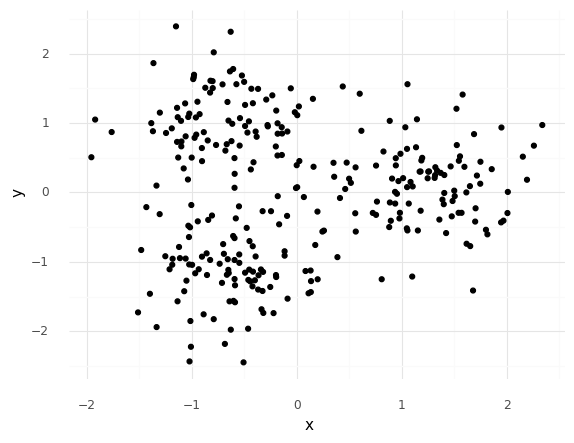

<ggplot: (8788866508376)>

In [18]:
z = StandardScaler()
d2[["x","y"]] = z.fit_transform(d2)

ggplot(d2, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

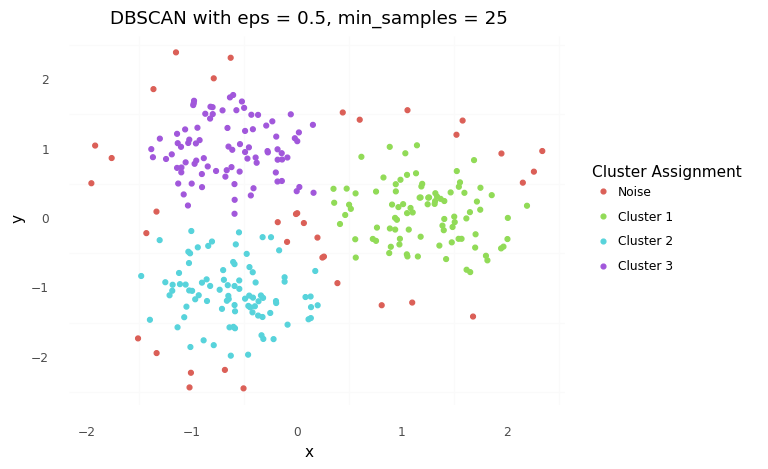

<ggplot: (8788866389245)>

In [19]:
db2 = DBSCAN(eps = 0.5, min_samples = 25).fit(d2)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db2.labels_)))]

d2["assignments"] = db2.labels_
(ggplot(d2, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 25"))

In [20]:
# grab only clustered data points
d2_clustered = d2.loc[(d2.assignments >= 0)]

print(silhouette_score(d2_clustered[["x","y"]], d2_clustered["assignments"]))

# overall 
print(silhouette_score(d2[["x","y"]], d2["assignments"]))

0.6140043544818719
0.4803831307840633


## Dataset 3

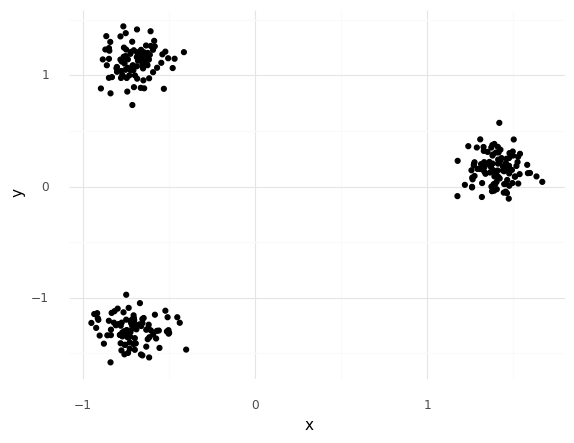

<ggplot: (8788866845428)>

In [21]:
d3 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM3.csv")

z = StandardScaler()
d3[["x","y"]] = z.fit_transform(d3)

ggplot(d3, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

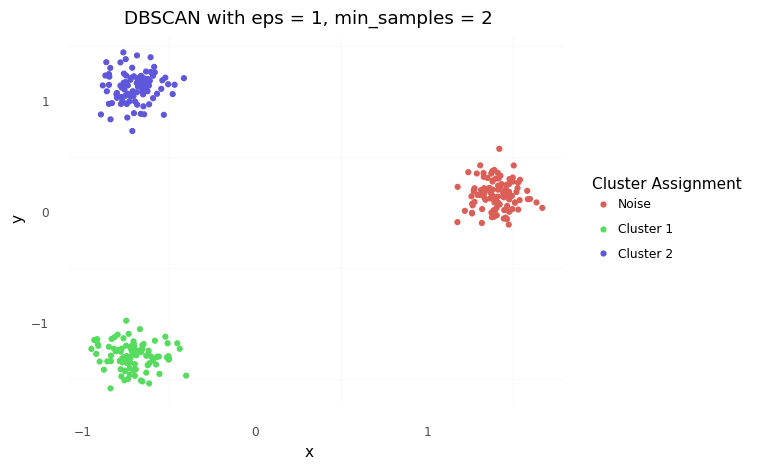

<ggplot: (8788866845188)>

In [22]:
db3 = DBSCAN(eps = 1, min_samples = 2).fit(d3)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db3.labels_)))]

d3["assignments"] = db3.labels_

(ggplot(d3, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 1, min_samples = 2"))

In [23]:
# grab only clustered data points
d3_clustered = d3.loc[(d3.assignments >= 0)]

print(silhouette_score(d3_clustered[["x","y"]], d3_clustered["assignments"]))

# overall 
print(silhouette_score(d3[["x","y"]], d3["assignments"]))

0.913619050733588
0.913619050733588


## Dataset 4

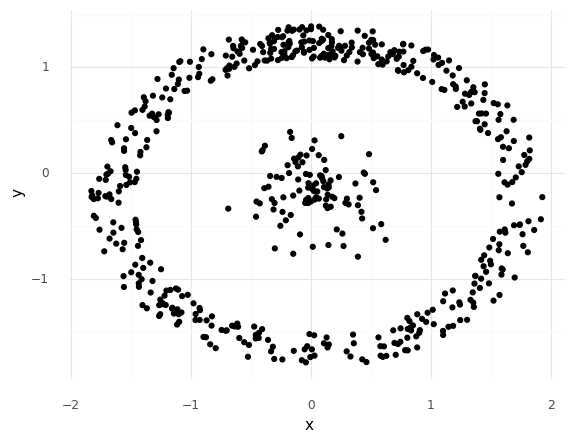

<ggplot: (8788866849320)>

In [24]:
d4 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM4.csv")

z = StandardScaler()
d4[["x","y"]] = z.fit_transform(d4)

ggplot(d4, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

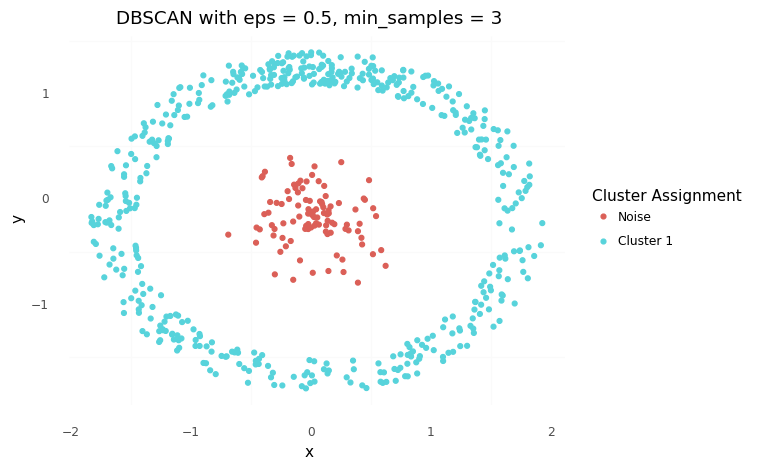

<ggplot: (8788866939871)>

In [25]:
db4 = DBSCAN(eps = 0.5, min_samples = 3).fit(d4)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db4.labels_)))]

d4["assignments"] = db4.labels_

(ggplot(d4, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 3"))

In [26]:
# grab only clustered data points
d4_clustered = d4.loc[(d4.assignments >= 0)]

print(silhouette_score(d4_clustered[["x","y"]], d4_clustered["assignments"]))

# overall 
print(silhouette_score(d4[["x","y"]], d4["assignments"]))

-0.042911477754913246
-0.042911477754913246


### Compare

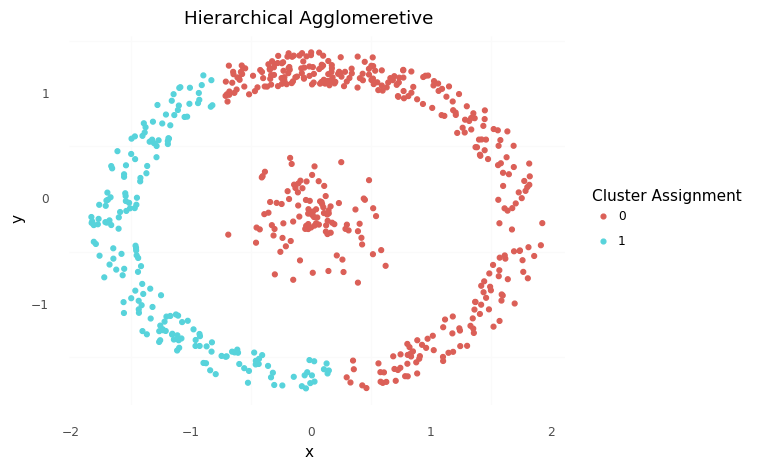

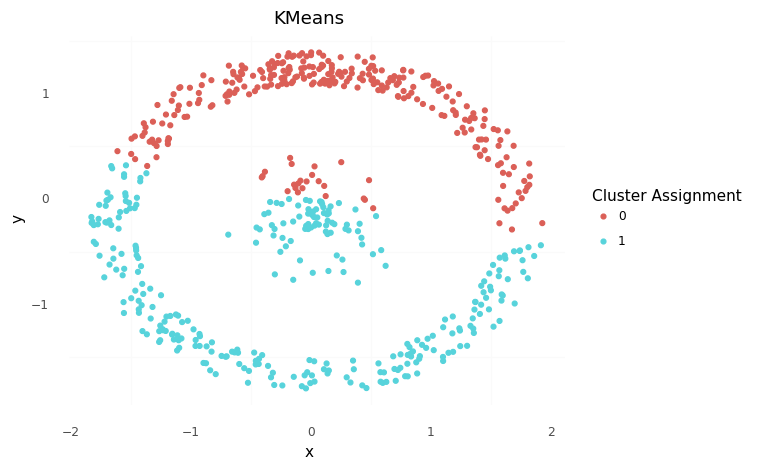

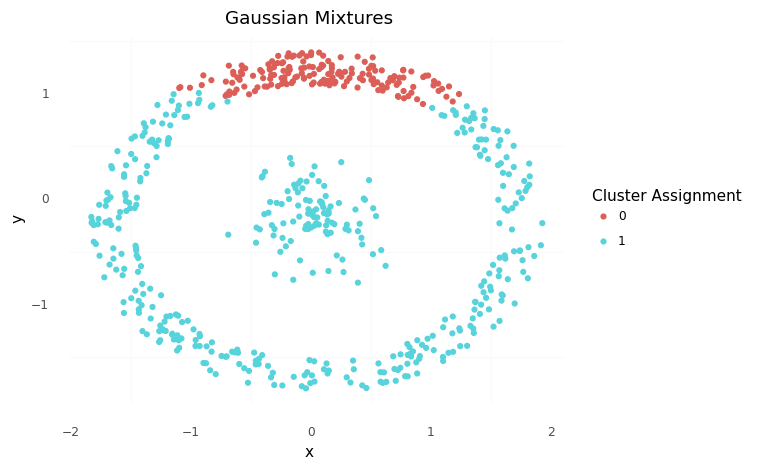

In [27]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac = AgglomerativeClustering(2)
km = KMeans(2)
gm = GaussianMixture(2)

hac.fit(d4[["x","y"]])
km.fit(d4[["x","y"]])
gm.fit(d4[["x","y"]])

d4["hac"] = hac.labels_
d4["km"] = km.labels_
d4["gm"] = gm.predict(d4[["x","y"]])


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))

## Dataset 5

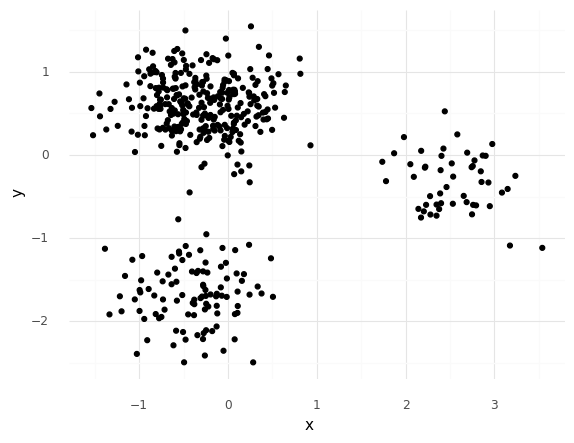

<ggplot: (8788866350734)>

In [28]:
d5 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM5.csv")

z = StandardScaler()
d5[["x","y"]] = z.fit_transform(d5)

ggplot(d5, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

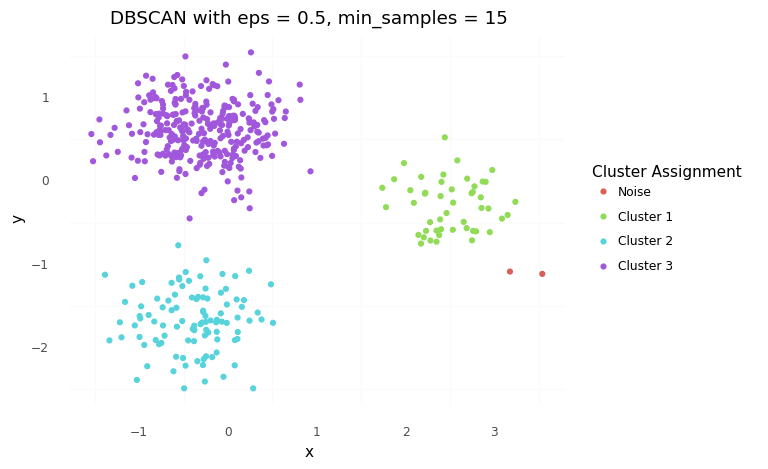

<ggplot: (8788867688783)>

In [29]:
db5 = DBSCAN(eps = 0.5, min_samples = 15).fit(d5)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db5.labels_)))]

d5["assignments"] = db5.labels_

(ggplot(d5, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 15"))

In [30]:
# grab only clustered data points
d5_clustered = d5.loc[(d5.assignments >= 0)]

print(silhouette_score(d5_clustered[["x","y"]], d5_clustered["assignments"]))

# overall 
print(silhouette_score(d5[["x","y"]], d5["assignments"]))

0.7048131054311416
0.6714107830551044


# Elbow Method

Read more [here](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf) if math excites you.

## Dataset 6

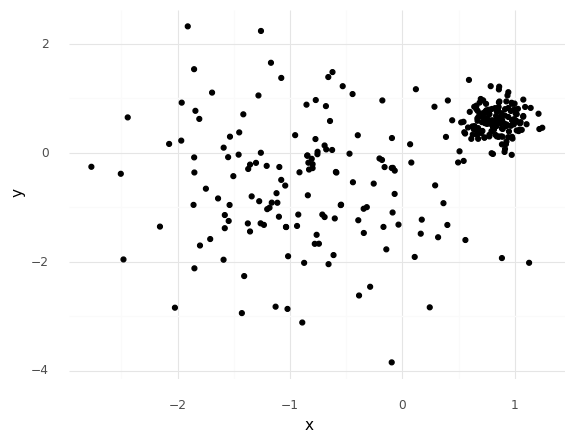

<ggplot: (8788867688792)>

In [31]:
d6 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM6.csv")

z = StandardScaler()
d6[["x","y"]] = z.fit_transform(d6)

ggplot(d6, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

In [35]:
# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
mins = 3
nn = NearestNeighbors(mins + 1)

nn.fit(d6[["x", "y"]])

distances, neighbors = nn.kneighbors(d6[["x", "y"]])

distances

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_neighbors=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error


array([[0.        , 0.03690981, 0.04037236, 0.04597748],
       [0.        , 0.05516926, 0.08888159, 0.08986399],
       [0.        , 0.01648388, 0.02195778, 0.02314588],
       ...,
       [0.        , 0.06869733, 0.07309685, 0.07758794],
       [0.        , 0.45863691, 0.62402991, 0.6937056 ],
       [0.        , 0.3352202 , 0.35858311, 0.4012105 ]])

In [36]:
# sort the distances
distances = np.sort(distances[:, mins], axis = 0)

/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: elbow.png


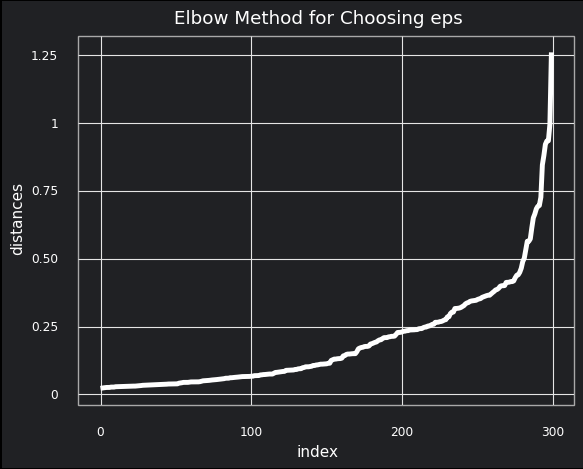

<ggplot: (8788865698907)>

In [37]:
#plot the distances
distances_df = pd.DataFrame({"distances": distances,
                             "index": list(range(0,len(distances)))})
plt = (ggplot(distances_df, aes(x = "index", y = "distances")) +
 geom_line(color = "white", size = 2) + theme_minimal() +
 labs(title = "Elbow Method for Choosing eps") +
 theme(panel_grid_minor = element_blank(),
      rect = element_rect(fill = "#202124ff"),
      axis_text = element_text(color = "white"),
      axis_title = element_text(color = "white"),
      plot_title = element_text(color = "white"),
      panel_border = element_line(color = "darkgray"),
      plot_background = element_rect(fill = "#202124ff")
      ))
ggsave(plot=plt, filename='elbow.png', dpi=300)

plt

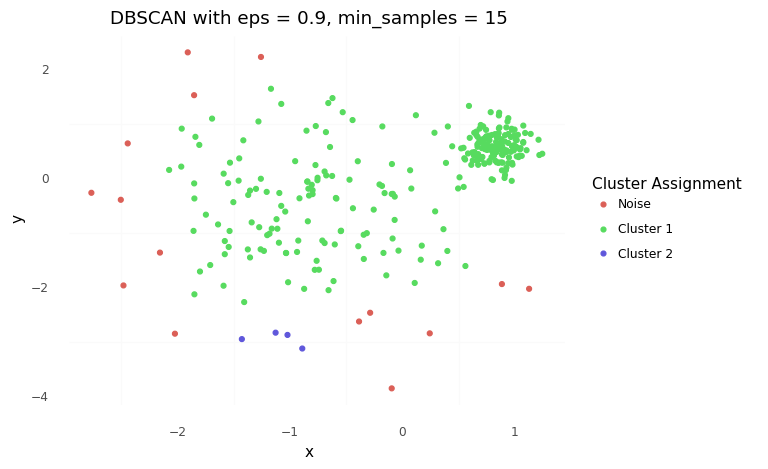

<ggplot: (8788865658507)>

In [38]:
db6 = DBSCAN(eps = 0.45, min_samples = 3).fit(d6)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db6.labels_)))]

d6["assignments"] = db6.labels_

(ggplot(d6, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.9, min_samples = 15"))

In [39]:
# grab only clustered data points
d6_clustered = d6.loc[(d6.assignments >= 0)]

print(silhouette_score(d6_clustered[["x","y"]], d6_clustered["assignments"]))

# overall 
print(silhouette_score(d6[["x","y"]], d6["assignments"]))

0.49007245503214775
0.396045290883704
